In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, pearsonr

import os
import time
import itertools

from glove_VI.glv import *

In [2]:
# import file names
files = os.listdir("data/SET3_Thirdtrial/")
files

['CDanc_CDmono12h_PROVIDET0.csv', 'CDevo_CDmono12h_PROVIDET0.csv']

In [3]:
exp_names = []
# for file in files:
file = files[0]
    
# define strain name
strain = file.split("_")[0]

# import data
df = pd.read_csv(f"data/SET3_Thirdtrial/{file}")
df.sort_values(by=["Treatments", "Time"], inplace=True)

# make sure that conditions have at least one measurement
dfs = []
for treatment, df_t in df.groupby("Treatments"):
    if df_t.shape[0] > 1:
        dfs.append(df_t)
df = pd.concat(dfs)

# determine species names 
species = df.columns.values[2:]

In [4]:
# init model 
model = gLV(dataframe=df, 
            species=species,
            lmbda=.001)

# init params
print(f"Number of parameters: {model.n_params}")

Number of parameters: 72


In [5]:
# fit to data 
f = model.fit_rmse(epochs=200)

Epoch 0, RMSE: 0.701
Epoch 10, RMSE: 0.121
Epoch 20, RMSE: 0.064
Epoch 30, RMSE: 0.055
Epoch 40, RMSE: 0.054
Epoch 50, RMSE: 0.052
Epoch 60, RMSE: 0.048
Epoch 70, RMSE: 0.047
Epoch 80, RMSE: 0.047
Epoch 90, RMSE: 0.046
Epoch 100, RMSE: 0.047
Epoch 110, RMSE: 0.047
Epoch 120, RMSE: 0.046
Epoch 130, RMSE: 0.047
Epoch 140, RMSE: 0.046
Epoch 150, RMSE: 0.046
Epoch 160, RMSE: 0.046
Epoch 170, RMSE: 0.046
Epoch 180, RMSE: 0.046
Epoch 190, RMSE: 0.046
Epoch 200, RMSE: 0.046


[Array(0.7005284, dtype=float32),
 Array(0.12053623, dtype=float32),
 Array(0.06351777, dtype=float32),
 Array(0.05507746, dtype=float32),
 Array(0.05387635, dtype=float32),
 Array(0.05218462, dtype=float32),
 Array(0.0479023, dtype=float32),
 Array(0.04659371, dtype=float32),
 Array(0.04744658, dtype=float32),
 Array(0.04620017, dtype=float32),
 Array(0.04652168, dtype=float32),
 Array(0.04656164, dtype=float32),
 Array(0.04634443, dtype=float32),
 Array(0.04655339, dtype=float32),
 Array(0.04614651, dtype=float32),
 Array(0.04610021, dtype=float32),
 Array(0.04622142, dtype=float32),
 Array(0.04619895, dtype=float32),
 Array(0.04565643, dtype=float32),
 Array(0.04618929, dtype=float32),
 Array(0.04627805, dtype=float32)]

In [6]:
r, A = reshape(model.shapes, model.z)

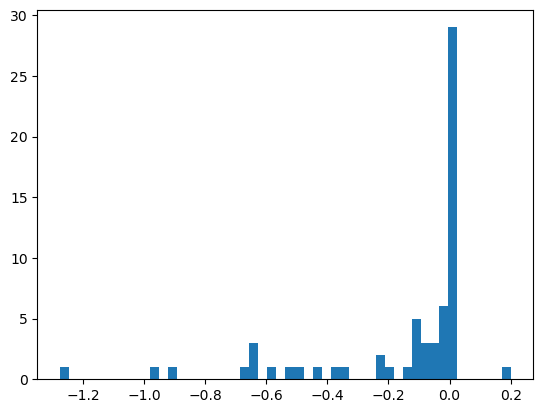

In [7]:
plt.hist(A.ravel(), bins=50)
plt.show()